# Hold-out run example

In [1]:
"""
Choose the dataset name for the ground_truth and graph embeddings (examples are: "monitor" and "openML")
"""
dataset_name = "monitor"

"""
choose integer number of ratio negative/positive for the negative sampling (0 to 20)
"""
neg_sample = 2

"""
Choose experiment ["hold_out","random_subsam","10_cv"] : 
- hold_out will get the train/test split within ./ground_truth/dataset_name/hold_out
- random_subsam will isolate 1 node from some clusters of similar nodes in the ground truth. The isolated nodes will not be seen during training
- 10_cv: will split the ground truth in 10 folds, using each fold as test at least once. 
"""
strategy = "hold_out"

"""
Choose to use the selected strategy to create a new split 
or reuse a previously created one (useful to repeat exact same experiment)
"""
create_new_split = False

print("Env variables set")

#import libraries
import step3_gcnsm
from step3_gcnsm import confusion_matrix as confusion_matrix
from step3_gcnsm import train as train
from step3_gcnsm import cross_validation as cross_validation
from step3_gcnsm import test_mask, train_mask
from step3_gcnsm import g
import step3_gcn_nn_concatenate as gcn_nn
import step3_gcn_loss as gcn_loss
import step3_gcn_training as gcn_training
import step3_plot_results as plot
step3_gcnsm.load_env(ds_name=dataset_name,ns=neg_sample,experiment=strategy,new_split=create_new_split)
print("\n SETUP IS READY")

Env variables set


Using backend: pytorch


Values to load
dataset_name=monitor
neg_sample= 2
strategy= hold_out
create_new_split= False
cross_v= 0
Dataset splits loaded
Train positive samples: 7215 Test positive samples: 1230
Meta-feature graph from datasets loaded

 SETUP IS READY


# Choose NN architecture and loss function, then run tests

### Config and run training
### NN architectures: 

In [2]:
##run this to see the different options of NN architectures
gcn_nn.get_options()

{0: 'Bert2_400',
 1: 'Bert2_832',
 2: 'Bert2_832_400_200_100',
 3: 'Bert2_832_600_400_200',
 4: 'Bert_300',
 5: 'Bert_300_300_200',
 6: 'Bert_768',
 7: 'Fasttext2',
 8: 'Fasttext2_150',
 9: 'Fasttext2_200_200',
 10: 'Fasttext2_200_200_100',
 11: 'Fasttext2_200_200_200',
 12: 'Fasttext2_200_200_200_100',
 13: 'Fasttext2_200_200_200_100_relu',
 14: 'Fasttext2_300_250_200_150',
 15: 'Fasttext2_364',
 16: 'Fasttext2_364_200_100',
 17: 'Fasttext2_364_200_100_relu',
 18: 'Fasttext2_364_300_200_100',
 19: 'Fasttext2_364_300_200_100_relu',
 20: 'Fasttext2_364_300_250_200',
 21: 'Fasttext2_364_364_364',
 22: 'Fasttext2_364_nn',
 23: 'Fasttext2_3GCN_300_250_200_150',
 24: 'Fasttext2_728',
 25: 'Fasttext2_728364',
 26: 'Fasttext2_728_364',
 27: 'Fasttext2d_300_250_200_150',
 28: 'Fasttext2d_364',
 29: 'Fasttext2d_364_364_364',
 30: 'Fasttext2d_728_364',
 31: 'Fasttext3GCN_300',
 32: 'FasttextSum_150',
 33: 'FasttextSum_300_250_200_150',
 34: 'FasttextSum_364',
 35: 'FasttextSum_364_200_100',
 36:

### Loss functions: 
{<br>
    "0": "ContrastiveLoss", <br>
    "1": "CosineEmbeddingLoss", <br>
}

### Optimizer
{<br>
    "adam" (default)<br>
    "sgd"<br> 
}


### Loss functions parameters examples: format -> [margin]+[aggregation_function] 
{<br>
    0.9+mean, <br>
    0.7+mean, <br>
    0.5+mean, <br>
    0.3+mean, <br>
    0.9+sum, <br>
    0.7+sum, <br>
    0.5+sum, <br>
    0.3+sum, <br>
}

### batch_splits examples: 
{<br>
    1024, <br>
    2048, <br>
}
### learning rate examples (lr): 
{<br>
    6e-3, <br>
    1e-2, <br>
}

### Hold-out run example

In [2]:
#train new model and specify parameters
training_object = gcn_training.Training()
training_object.set_training(
            net_name= "Fasttext2_364",  #_of_option for NN architecture
            batch_splits=1024 ,#_of_sets(this will (give dataset / batch_splits) size of batch
            lr=1e-2 , #learning rate for training (e.g. 1e-3 )
            loss_name=gcn_loss.get_option_name(1), #_of_option for loss 
            loss_parameters="0.5+mean" ,#loss function parameters separated by '+' e.g. for cosine and contrastive "0.0+mean"
            optimizer_name="sgd" ) #adam or sgd, default adam

train(training_object,50,nsample=2)

Start of training...NN Fasttext2_364 Loss CosineEmbeddingLoss Split 1024: 


/home/pablo/gcnsm/step3v2/step3_gcnsm.py:308: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(result)


Ep:0, loss:0.00542, loss_test:0.25413, lr:1.00e-02, fs:0.61440 (r=0.819,p=0.492),  time:115.435, tt:115.435
##########Best model found so far##########
Ep:1, loss:0.00447, loss_test:0.25262, lr:9.90e-03, fs:0.56854 (r=0.595,p=0.544),  time:114.880, tt:229.761
Ep:2, loss:0.00424, loss_test:0.26367, lr:9.80e-03, fs:0.43499 (r=0.370,p=0.528),  time:114.901, tt:344.703
Ep:3, loss:0.00417, loss_test:0.24770, lr:9.70e-03, fs:0.56570 (r=0.597,p=0.538),  time:114.660, tt:458.641
Ep:4, loss:0.00403, loss_test:0.23868, lr:9.61e-03, fs:0.62712 (r=0.722,p=0.554),  time:114.503, tt:572.513
##########Best model found so far##########
Ep:5, loss:0.00391, loss_test:0.23872, lr:9.51e-03, fs:0.62332 (r=0.659,p=0.592),  time:115.765, tt:694.587
Ep:6, loss:0.00366, loss_test:0.23056, lr:9.41e-03, fs:0.66640 (r=0.674,p=0.659),  time:123.518, tt:864.624
##########Best model found so far##########
Ep:7, loss:0.00294, loss_test:0.18882, lr:9.32e-03, fs:0.73027 (r=0.828,p=0.653),  time:130.167, tt:1041.340
###

## Plot results <br>

<p>This will plot charts of fscore/accuracy for all the results that match the parameters options under the /results folder</p>

#### Parameters options

<p> Choose one of each and pass it to the corresponding plot function in the following order:

<b>1) neg_sample</b> = [1,2,3,4...etc] <br>
<b>2) ds_name</b> = ["openml_203ds_datasets_matching"] <br>
<b>3) experiment</b> = ["10_cv","random_subsam","hold_out"] <br>
<b>4) archi</b> = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"] <br>
<b>5) optimizer</b> = ["adam","sgd"] <br>
<b>6) loss_functions</b> = ["ContrastiveLoss","CosineEmbeddingLoss"] <br>

#### Types of chart
<b>plot.plot_cv_details:</b> line charts of accuracy and fscore results for the several runs in cv_10 and random_subsampling<br>
<b>plot.plot_bar </b>: bar charts of maximum results of accuracy and fscore for the several runs in cv_10 and random_subsampling <br>
<b>plot.plot_details</b>: line charts of accuracy, fscore, recall and precision results for a hold_out run

In [ ]:
##examples
##Line chart: plot hold_out results
# plot.plot_details(2,"monitor","hold_out","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["50"])
##Line chart: plot 10-fold-cv and random_subsampling results
# plot.plot_bar(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])
##Bar chart: plot 10-fold-cv and random_subsampling results
# plot.plot_cv_details(2,"openML","random_subsam","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["120"])


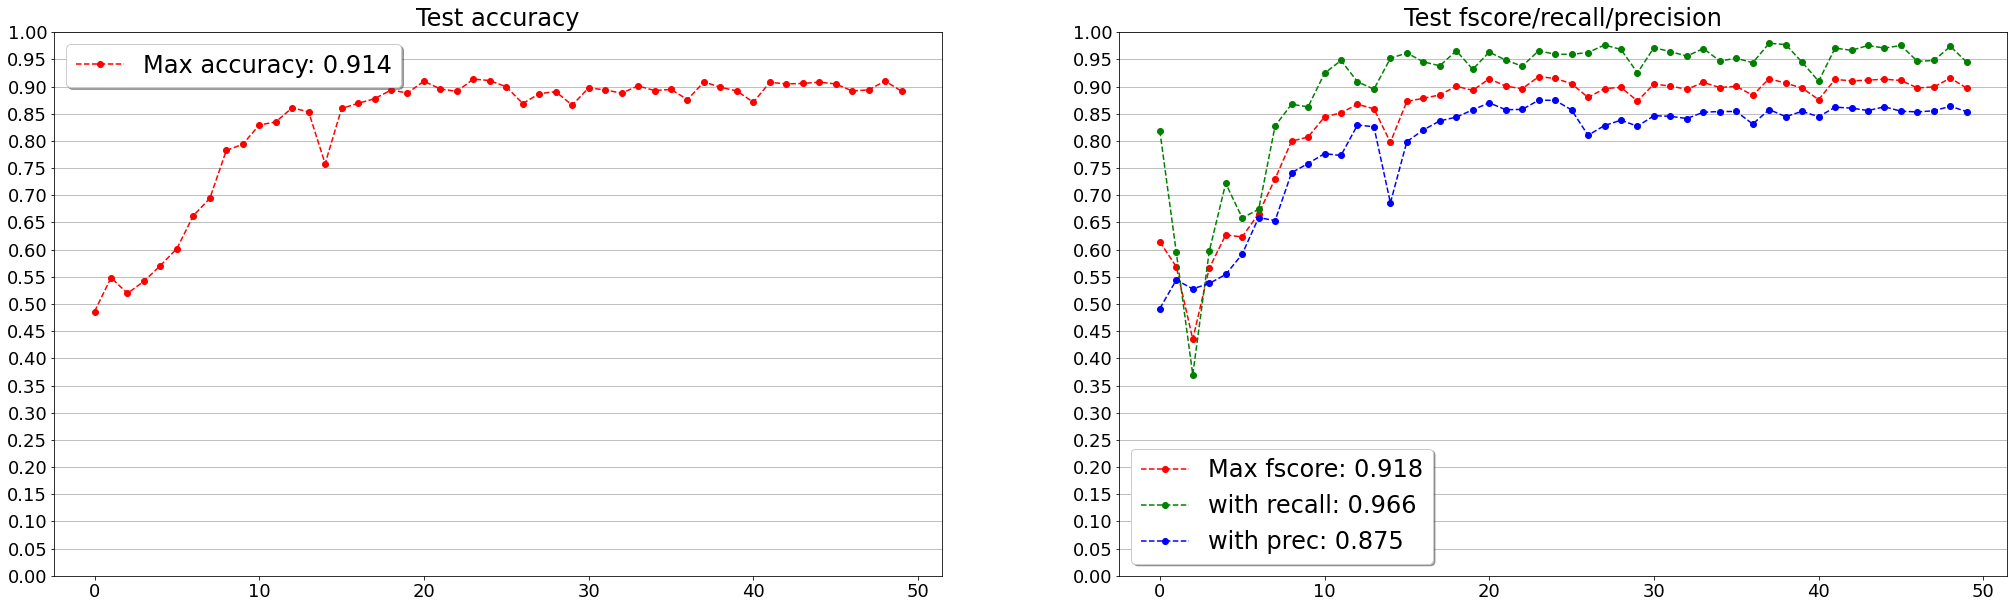

In [2]:
plot.plot_details(2,"monitor","hold_out","Fasttext2_364","sgd","CosineEmbeddingLoss",nit=["50"])